## Importing Libraries + Data

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [104]:
df = pd.read_csv('depression_stats/Data-Table1.csv')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,Major depressive episode in the past year amon...,NaN,NaN,NaN
2,NaN,Percentage of U.S. youths with a major depress...,NaN,NaN,NaN
3,NaN,NaN,Male,Female,NaN
4,NaN,2004,5,13.10,in %


## Cleaning data

In [105]:
df.drop(labels=['Unnamed: 0', 'Unnamed: 4'], axis=1,
        inplace=True)  # Removing 1st and last columns
df.dropna(inplace=True)  # dropping all rows with NaN
df.rename(columns={"Unnamed: 1": "Year", "Unnamed: 2": "male_episodes",
                   "Unnamed: 3": "female_episodes"}, inplace=True)  # Renaming columns
df = df.astype({'male_episodes': 'float', 'female_episodes': 'float'}) # Converting columns values to type float

In [106]:
df.head()

,Year,male_episodes,female_episodes
4,2004,5.0,13.1
5,2005,4.5,13.3
6,2006,4.2,11.8
7,2007,4.6,11.9
8,2008,4.3,12.5


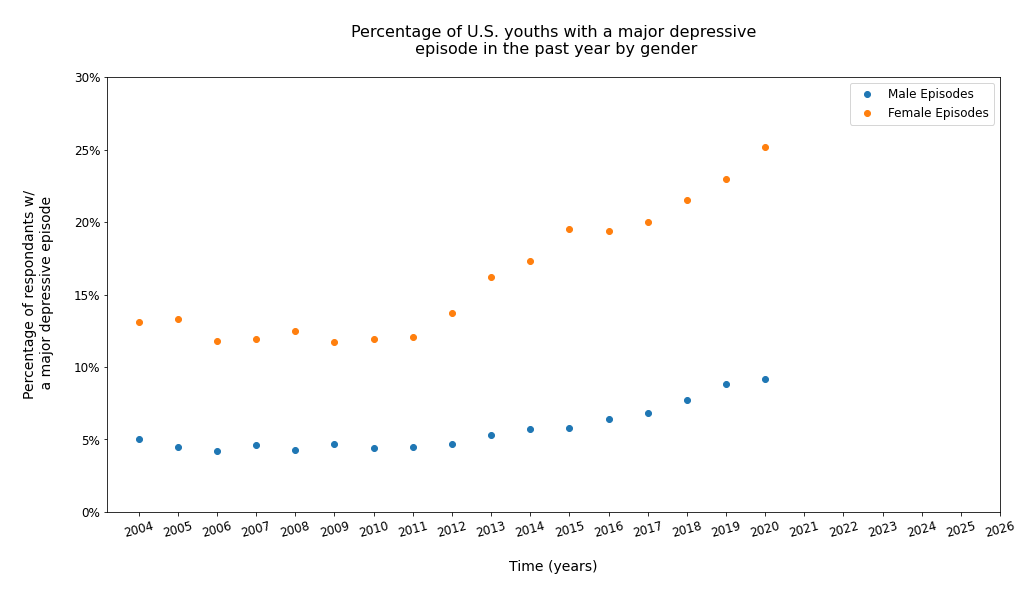

In [102]:
# Define variables
x = df['Year']
y = df['male_episodes']
z = df['female_episodes']
years = []
for i in range(23):
   years.append(2004+i)

# Adjust figure size
plt.figure(figsize=(16, 8))

# Plot male episodes scatter plot 
plt.plot(x, y, 'o', label='Male Episodes')

# Plot female episodes scatter plot on the same graph
plt.plot(x, z, 'o', label='Female Episodes')

# Adjusting x and y axis and title labels
plt.xlabel('\nTime (years)\n', fontsize=14)
plt.ylabel(
    '\nPercentage of respondants w/\n a major depressive episode\n', fontsize=14)
plt.title('\nPercentage of U.S. youths with a major depressive\n episode in the past year by gender\n', fontsize=16)

# Changing spacing/location/values/size of x and y ticks
plt.yticks(ticks=np.arange(0, 35, step=5), labels=[
           f'{i}%' for i in range(0, 35, 5)], fontsize=12)
plt.xticks(ticks=np.arange(0, 23, step=1),
           labels=years, fontsize=12, rotation=15)

# Adding a legend
plt.legend(fontsize=12)

# Showing the graph
plt.show()
